In [9]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt

In [16]:
DATA_ROOT = "/Users/btimar/Dropbox/data/mps/fidelity-variation-001/"

In [17]:
def get_logdict(name,  seed):
    nm = os.path.join(DATA_ROOT, "{0}_L=8_batch_size=512_seed={1}_logdict.json".format(name, seed))
    with open(nm) as f:
        return json.load(f)

In [23]:
from config import state_names

In [22]:
nseed=20

In [43]:
fidelities = {nm : np.empty(20,dtype=object) for nm in state_names}
max_bds ={nm : np.empty(20,dtype=object) for nm in state_names}
losses ={nm : np.empty(20,dtype=object) for nm in state_names}
s2 = {nm : np.empty(20,dtype=object) for nm in state_names}

for nm in state_names:
    for s in range(nseed):
        l = get_logdict(nm,s)
        fidelities[nm][s] = l['fidelity_qutip']
        max_bds[nm][s] = l['max_bond_dim']
        losses[nm][s] = l['loss']
        s2[nm][s] = l['s2']

In [28]:
%matplotlib inline

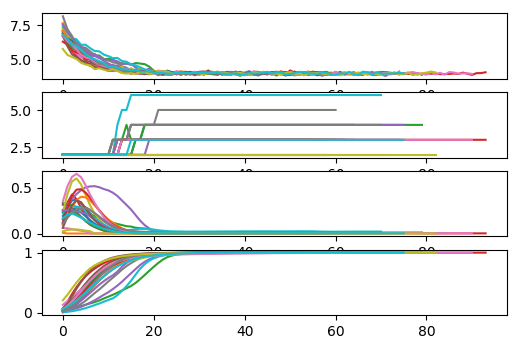

In [46]:
fig, axes = plt.subplots(4,1,dpi=100)
name = 'tfim_ground'
for s in range(nseed):
    axes[0].plot(losses[name][s])
    axes[1].plot(max_bds[name][s])
    axes[2].plot(s2[name][s])
    axes[3].plot(fidelities[name][s])